In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_C_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,NaN,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,NaN,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,NaN,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,NaN,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,NaN,0.0760,0.0958,0.0990,NaN,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,NaN,0.0437,0.0180,0.0292,NaN,0.1171,0.1257,0.1178,NaN,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,NaN,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,NaN,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	20
float64		column 3	25
float64		column 4	19
float64		column 5	24
float64		column 6	20
float64		column 7	15
float64		column 8	21
float64		column 9	23
float64		column 10	24
float64		column 11	17
float64		column 12	21
float64		column 13	23
float64		column 14	17
float64		column 15	20
float64		column 16	18
float64		column 17	21
float64		column 18	18
float64		column 19	24
float64		column 20	27
float64		column 21	20
float64		column 22	15
float64		column 23	16
float64		column 24	22
float64		column 25	14
float64		column 26	22
float64		column 27	17
float64		column 28	33
float64		column 29	15
float64		column 30	22
float64		column 31	21
float64		column 32	15
float64		column 33	25
float64		column 34	21
float64		column 35	21
float64		column 36	12
float64		column 37	26
float64		column 38	18
float64		column 39	17
float64		column 40	18
float64		column 41	17
float64		column 42	21
float64		column 43	32
float64		column 44	22
flo

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,190.000000,188.000000,183.000000,189.000000,184.000000,188.000000,193.000000,187.00000,185.000000,184.000000,...,180.000000,187.000000,190.000000,186.000000,192.000000,180.000000,181.000000,185.000000,190.000000,190.000000
mean,0.028022,0.038528,0.043062,0.053775,0.074786,0.101097,0.121818,0.13765,0.172734,0.206541,...,0.016237,0.013635,0.010831,0.010562,0.009325,0.008107,0.007875,0.007823,0.008014,0.006612
std,0.021621,0.033759,0.037990,0.047869,0.054439,0.055602,0.062904,0.08366,0.115026,0.133724,...,0.012232,0.009915,0.007005,0.006966,0.007162,0.005718,0.005796,0.006056,0.006286,0.005145
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.00550,0.007500,0.019300,...,0.000900,0.000800,0.000500,0.001000,0.000600,0.000400,0.000700,0.000600,0.000100,0.000600
25%,0.013100,0.015275,0.018450,0.023900,0.040575,0.064600,0.081200,0.08670,0.095000,0.113800,...,0.008600,0.007350,0.005125,0.005300,0.003975,0.004175,0.003700,0.003600,0.003600,0.003125
50%,0.022000,0.029850,0.034100,0.043200,0.063000,0.091350,0.105600,0.11380,0.146600,0.180250,...,0.013900,0.011700,0.009850,0.009300,0.007500,0.007050,0.006100,0.005700,0.006550,0.005300
75%,0.034350,0.049025,0.055050,0.063300,0.097750,0.126975,0.154300,0.17145,0.222800,0.261275,...,0.020675,0.017000,0.015050,0.013775,0.012150,0.010275,0.010500,0.010200,0.010675,0.008500
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.45660,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.037700,0.036400,0.043900


<AxesSubplot:>

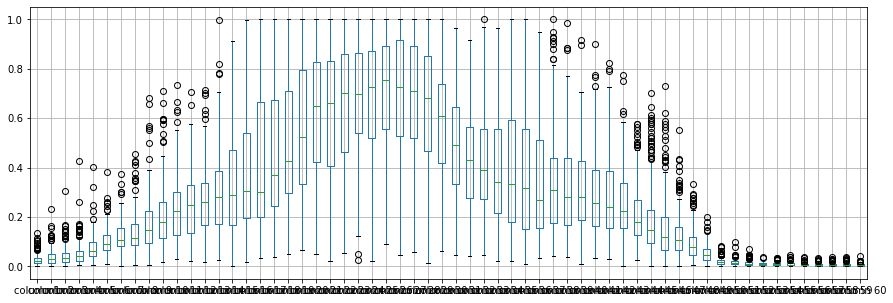

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.028022
column 2     0.038528
column 3     0.043062
column 4     0.053775
column 5     0.074786
column 6     0.101097
column 7     0.121818
column 8     0.137650
column 9     0.172734
column 10    0.206541
column 11    0.235817
column 12    0.249832
column 13    0.273565
column 14    0.295718
column 15    0.323566
column 16    0.380227
column 17    0.410473
column 18    0.449887
column 19    0.492340
column 20    0.553761
column 21    0.620882
column 22    0.620211
column 23    0.653398
column 24    0.668752
column 25    0.677441
column 26    0.704798
column 27    0.701030
column 28    0.686669
column 29    0.645497
column 30    0.585716
column 31    0.504398
column 32    0.437112
column 33    0.419079
column 34    0.395578
column 35    0.393617
column 36    0.378859
column 37    0.354350
column 38    0.339932
column 39    0.321358
column 40    0.311194
column 41    0.289900
column 42    0.277716
column 43    0.250522
column 44    0.213437
column 45    0.196354
column 46 

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.724947,0.573722,0.376091,0.286772,0.226716,0.206302,0.371667,0.334545,0.329432,...,0.291152,0.325214,0.246572,0.283814,0.241928,0.300810,0.345896,0.345470,0.345247,0.231080
column 2,0.724947,1.000000,0.783934,0.606713,0.464329,0.363446,0.315423,0.311416,0.358927,0.303183,...,0.311079,0.457532,0.343076,0.382427,0.380698,0.261905,0.291890,0.377654,0.347240,0.327454
column 3,0.573722,0.783934,1.000000,0.772566,0.586290,0.301279,0.242745,0.223618,0.317506,0.251682,...,0.218711,0.458640,0.318648,0.305128,0.339887,0.276614,0.348672,0.314890,0.464321,0.387093
column 4,0.376091,0.606713,0.772566,1.000000,0.765890,0.301159,0.273665,0.243611,0.283775,0.265547,...,0.166272,0.378674,0.354937,0.335338,0.259973,0.209454,0.324955,0.356121,0.416907,0.389527
column 5,0.286772,0.464329,0.586290,0.765890,1.000000,0.520504,0.329757,0.169649,0.203437,0.207868,...,0.123920,0.311617,0.359030,0.163614,0.211842,0.263978,0.223986,0.188678,0.359625,0.319444
column 6,0.226716,0.363446,0.301279,0.301159,0.520504,1.000000,0.702560,0.440755,0.248488,0.185745,...,0.189812,0.214073,0.172340,0.111496,0.142800,0.263166,0.101486,0.223162,0.235259,0.199301
column 7,0.206302,0.315423,0.242745,0.273665,0.329757,0.702560,1.000000,0.646746,0.488123,0.426680,...,0.167553,0.146866,0.061147,0.176614,0.147146,0.211882,0.162606,0.261864,0.192988,0.265852
column 8,0.371667,0.311416,0.223618,0.243611,0.169649,0.440755,0.646746,1.000000,0.758061,0.647525,...,0.231435,0.235603,0.079845,0.243881,0.159711,0.292907,0.232464,0.317844,0.173061,0.077277
column 9,0.334545,0.358927,0.317506,0.283775,0.203437,0.248488,0.488123,0.758061,1.000000,0.861766,...,0.160618,0.240286,0.118380,0.199181,0.078418,0.193812,0.211860,0.191818,0.068860,0.118538
column 10,0.329432,0.303183,0.251682,0.265547,0.207868,0.185745,0.426680,0.647525,0.861766,1.000000,...,0.126973,0.146536,0.096879,0.242207,0.109626,0.074913,0.147888,0.171730,0.059967,0.100788


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+24,60+24+24,60+24+24+24,60+24+24,60+24,60], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 17.064421873826248
Epoch: 1 , loss: 16.852916717529297
Epoch: 2 , loss: 16.746218021099384
Epoch: 3 , loss: 16.652301935049202
Epoch: 4 , loss: 16.573189075176533
Epoch: 5 , loss: 16.465985518235428
Epoch: 6 , loss: 16.38452324500451
Epoch: 7 , loss: 16.33444382594182
Epoch: 8 , loss: 16.229742416968712
Epoch: 9 , loss: 16.163451268122746
Epoch: 10 , loss: 15.959617468026968
Epoch: 11 , loss: 15.855614148653471
Epoch: 12 , loss: 15.647515737093412
Epoch: 13 , loss: 15.375275025000938
Epoch: 14 , loss: 15.006295424241285
Epoch: 15 , loss: 14.360369755671574
Epoch: 16 , loss: 13.568344042851376
Epoch: 17 , loss: 12.286935586195726
Epoch: 18 , loss: 11.003772588876577
Epoch: 19 , loss: 10.117189700786884
Epoch: 20 , loss: 9.523786031282865
Epoch: 21 , loss: 9.249031873849722
Epoch: 22 , loss: 8.901141680203951
Epoch: 23 , loss: 8.924945391141451
Epoch: 24 , loss: 8.569653474367582
Epoch: 25 , loss: 8.6703

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.066400
column 2     0.057500
column 3     0.084200
column 4     0.037200
column 5     0.045800
column 6     0.077100
column 7     0.077100
column 8     0.113000
column 9     0.235300
column 10    0.183800
column 11    0.234355
column 12    0.243853
column 13    0.265455
column 14    0.198400
column 15    0.284000
column 16    0.403900
column 17    0.583700
column 18    0.679200
column 19    0.608600
column 20    0.504782
column 21    0.568361
column 22    0.201300
column 23    0.208200
column 24    0.168600
column 25    0.248400
column 26    0.637251
column 27    0.298400
column 28    0.465500
column 29    0.699000
column 30    0.747400
column 31    0.795600
column 32    0.798100
column 33    0.671500
column 34    0.694200
column 35    0.744000
column 36    0.816900
column 37    0.891200
column 38    1.000000
column 39    0.875300
column 40    0.706100
column 41    0.680300
column 42    0.589800
column 43    0.461800
column 44    0.363900
column 45    0.149200
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,-0.006077,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-0.432413,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.006118,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.043599,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
204,0.000000,0.0,0.0,-0.017759,0.000000,0.0,0.0,-0.008613,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
205,-0.035575,0.0,0.0,0.000000,0.010260,0.0,0.0,0.000000,-0.016419,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.007475,0.000000,0.0
206,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.003390,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

6.963933445396025

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.1562785029040274

In [19]:
new_df.iloc[66,:]

column 1     0.026500
column 2     0.044000
column 3     0.013700
column 4     0.046796
column 5     0.030500
column 6     0.043800
column 7     0.034100
column 8     0.078000
column 9     0.084400
column 10    0.077900
column 11    0.032700
column 12    0.206000
column 13    0.190800
column 14    0.106500
column 15    0.145700
column 16    0.223200
column 17    0.207000
column 18    0.110500
column 19    0.107800
column 20    0.116500
column 21    0.222400
column 22    0.068900
column 23    0.206000
column 24    0.238400
column 25    0.090400
column 26    0.489552
column 27    0.587200
column 28    0.845700
column 29    0.846700
column 30    0.767900
column 31    0.805500
column 32    0.626000
column 33    0.654500
column 34    0.874700
column 35    0.988500
column 36    0.934800
column 37    0.696000
column 38    0.573300
column 39    0.587200
column 40    0.666300
column 41    0.565100
column 42    0.524700
column 43    0.195538
column 44    0.199700
column 45    0.151200
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.020000,0.0371,0.0428,0.020700,0.095400,0.0986,0.1539,0.160100,0.310900,0.211100,...,0.0232,0.0027,0.006500,0.0159,0.0072,0.0167,0.018000,0.008400,0.009000,0.0032
1,0.045300,0.0523,0.0843,0.068900,0.118300,0.2583,0.2156,0.348100,0.333700,0.287200,...,0.0125,0.0084,0.008900,0.0048,0.0094,0.0191,0.007923,0.004900,0.005200,0.0044
2,0.026200,0.0582,0.1099,0.108300,0.097400,0.2280,0.2431,0.377100,0.559800,0.186987,...,0.0033,0.0232,0.016600,0.0095,0.0180,0.0244,0.031600,0.016400,0.009500,0.0078
3,0.010000,0.0171,0.0623,0.020500,0.020500,0.0368,0.1098,0.127600,0.059800,0.126400,...,0.0241,0.0121,0.009718,0.0150,0.0085,0.0073,0.005000,0.004400,0.004000,0.0117
4,0.076200,0.0666,0.0481,0.039400,0.059000,0.0649,0.1209,0.246700,0.356400,0.445900,...,0.0156,0.0031,0.005400,0.0105,0.0110,0.0015,0.007200,0.004800,0.010700,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018700,0.0346,0.0168,0.017700,0.039300,0.1630,0.2028,0.125801,0.232800,0.268400,...,0.0203,0.0116,0.009800,0.0199,0.0033,0.0101,0.006500,0.011500,0.019300,0.0157
204,0.032300,0.0101,0.0298,0.038641,0.076000,0.0958,0.0990,0.093187,0.103000,0.215400,...,0.0051,0.0061,0.009300,0.0135,0.0063,0.0063,0.003400,0.003200,0.006200,0.0067
205,0.016625,0.0437,0.0180,0.029200,0.045360,0.1171,0.1257,0.117800,0.109381,0.252900,...,0.0155,0.0160,0.002900,0.0051,0.0062,0.0089,0.014000,0.006325,0.007700,0.0031
206,0.030300,0.0353,0.0490,0.060800,0.016700,0.1354,0.1465,0.112300,0.194500,0.235400,...,0.0042,0.0086,0.004600,0.0126,0.0036,0.0035,0.006790,0.007900,0.003600,0.0048


In [21]:
imputations[-1].to_excel("Sonar_C_10(imp).xlsx", index=False, header=False)